In [1]:
# データを総合して解析を行う
import os
import scipy.optimize
import itertools
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器
import pandas as pd
import numpy as np
import glob #フォルダ内の特定の拡張子のファイルを一括で読み込む
%matplotlib inline
import matplotlib.pyplot as plt
os.chdir("C:\\Users\\cocoa\\Documents\\実験\\BL-12C\\220205-BL12C-Fe")
print(os.getcwd())

C:\Users\cocoa\Documents\実験\BL-12C\220205-BL12C-Fe


In [2]:
"""フォルダ内のXANファイルをすべて読み込む"""
spectrum=[[],[],[]]
n,m = 1, 1

for filename in glob.glob("*.xan*"):
    p = pd.read_csv(filename)
    
    for i in range(len(p)):
        if p["[XAN_DATA]"][i]=="[BG_BEGIN]":
            n = i
        elif p["[XAN_DATA]"][i]=="[BG_END]":
            m = i
        else: continue
    
    data = pd.read_csv(filename,encoding="SHIFT_JIS",sep=('\t'),usecols=[1,2,3,4],names=[1,2,3,4],
                       skiprows=n+3)[1:m-n]
    spectrum[0].append(data[1])
    spectrum[1].append(data[2])
    spectrum[2].append(filename)


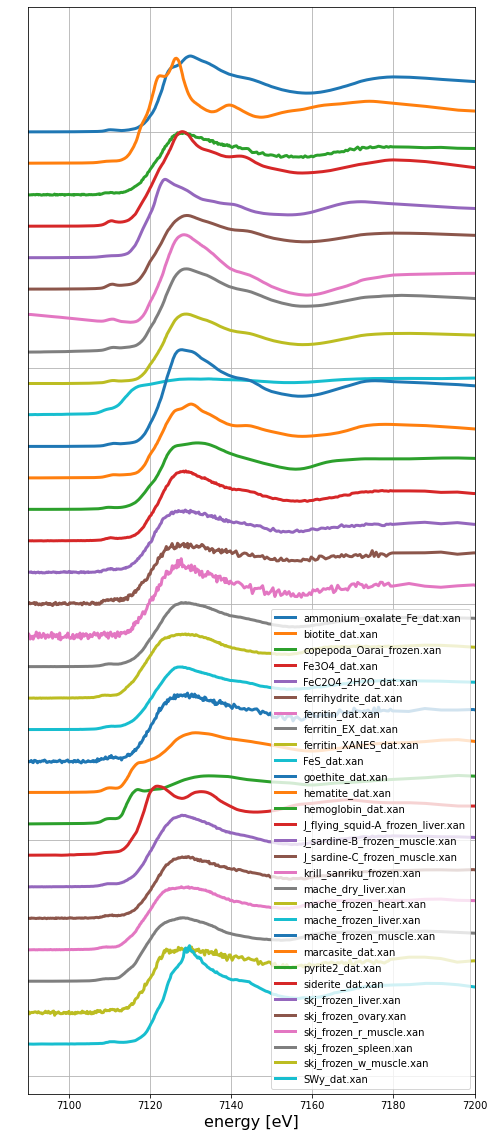

In [3]:
"""ひとまずすべて描画"""
from matplotlib import pylab as plt

fig = plt.figure(figsize=(8,20))
ax = fig.add_subplot(111)
ax.set_xlabel("energy [eV]",fontsize=16)
ax.set_ylabel(" ")
ax.axes.yaxis.set_ticklabels([])
ax.set_xlim(7090, 7200)
ax.grid()
ax.tick_params(left=False)

for n in range(len(spectrum[2])):
    energy = [float(i) for i in spectrum[0][n]]
    line = spectrum[1][n] + 5 - n/1.5 
    ax.plot(energy,line,linewidth = 3,label=spectrum[2][n])
ax.legend(loc="lower right")

In [4]:
print("sample list")
for i in range(len(spectrum[2])):
    print(str(i)+"  "+spectrum[2][i])

sample list
0  ammonium_oxalate_Fe_dat.xan
1  biotite_dat.xan
2  copepoda_Oarai_frozen.xan
3  Fe3O4_dat.xan
4  FeC2O4_2H2O_dat.xan
5  ferrihydrite_dat.xan
6  ferritin_dat.xan
7  ferritin_EX_dat.xan
8  ferritin_XANES_dat.xan
9  FeS_dat.xan
10  goethite_dat.xan
11  hematite_dat.xan
12  hemoglobin_dat.xan
13  J_flying_squid-A_frozen_liver.xan
14  J_sardine-B_frozen_muscle.xan
15  J_sardine-C_frozen_muscle.xan
16  krill_sanriku_frozen.xan
17  mache_dry_liver.xan
18  mache_frozen_heart.xan
19  mache_frozen_liver.xan
20  mache_frozen_muscle.xan
21  marcasite_dat.xan
22  pyrite2_dat.xan
23  siderite_dat.xan
24  skj_frozen_liver.xan
25  skj_frozen_ovary.xan
26  skj_frozen_r_muscle.xan
27  skj_frozen_spleen.xan
28  skj_frozen_w_muscle.xan
29  SWy_dat.xan


[0.45639533533802573, 0.562838587943165]
CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
1.9308179865368573e-05


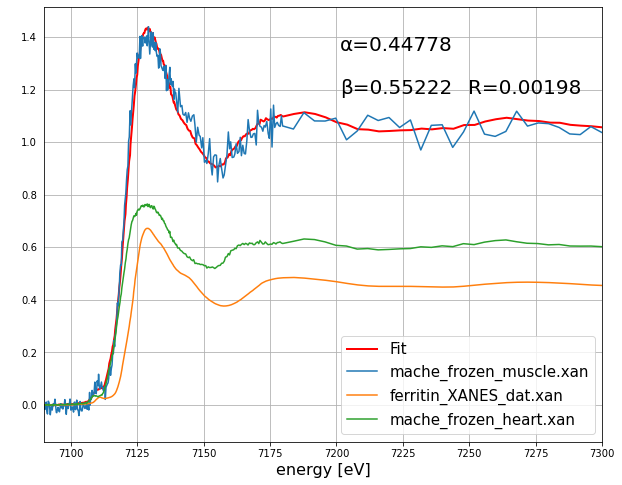

In [7]:
'2成分手動'
sample = [20,8,18]

%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_xlabel("energy [eV]",fontsize=16)
ax.set_ylabel(" ")
ax.set_xlim(7090, 7300)
ax.grid()
ax.tick_params(left=False)

target = spectrum[1][sample[0]]
std1 = spectrum[1][sample[1]]
std2 = spectrum[1][sample[2]]

def Calc(x):  
    y =  std1*x[0] + std2*x[1]
    return(y)

def Rval(x):
    R = sum((Calc(x) -  target)**2)/sum(target**2)#この計算式２条がsumのカッコ内に入る
    return(R)

Fit = scipy.optimize.minimize(Rval,x0=(0,0),bounds=[(-1,1),(-1,1)])
a,b = Fit.x[0], Fit.x[1]
factor = [1,a,b]

ax.plot(energy,Calc([a,b]),color="red",linewidth = 2, label="Fit")

for m in range(len(sample)):
    energy =  [float(i) for i in spectrum[0][sample[m]]]
    value = spectrum[1][sample[m]]*factor[m]
    ax.plot(energy,value, label=spectrum[2][sample[m]])
    
ax.text(0.53,0.9,"α="+str(round(a/(a+b),5)),size=20,transform=ax.transAxes)
ax.text(0.53,0.8,"β="+str(round(b/(a+b),5)),size=20,transform=ax.transAxes)
ax.text(0.76,0.8,"R="+str(round(Rval([a,b]),5)),size=20,transform=ax.transAxes)
ax.legend(loc="lower right", fontsize=15)
print([a,b])
print(Fit.message)
print(sum(Calc([a,b]) -  target)**2/sum(target)**2)

In [8]:
Calc([a,b])

1     -0.000969
2      0.001868
3      0.000331
4      0.001065
5      0.002564
         ...   
337    1.073678
338    1.065801
339    1.062700
340    1.060360
341    1.056257
Name: 2, Length: 341, dtype: float64

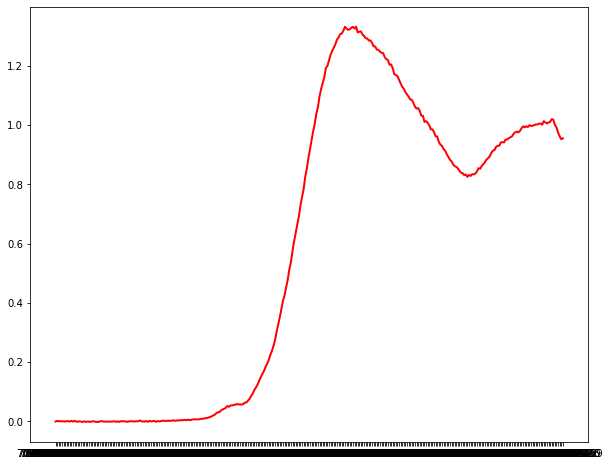

In [32]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(energy1,Calc([a,b]),color="red",linewidth = 2, label="Fit")


In [40]:
print("sample list")
for i in range(len(spectrum[2])):
    print(str(i)+"  "+spectrum[2][i])

sample list
0  ammonium_oxalate_Fe_dat.xan
1  biotite_dat.xan
2  copepoda_Oarai_frozen.xan
3  Fe3O4_dat.xan
4  FeC2O4_2H2O_dat.xan
5  ferrihydrite_dat.xan
6  ferritin_dat.xan
7  ferritin_EX_dat.xan
8  ferritin_XANES_dat.xan
9  FeS_dat.xan
10  goethite_dat.xan
11  hematite_dat.xan
12  hemoglobin_dat.xan
13  J_flying_squid-A_frozen_liver.xan
14  J_sardine-B_frozen_muscle.xan
15  J_sardine-C_frozen_muscle.xan
16  krill_sanriku_frozen.xan
17  mache_dry_liver.xan
18  mache_frozen_heart.xan
19  mache_frozen_liver.xan
20  mache_frozen_muscle.xan
21  marcasite_dat.xan
22  pyrite2_dat.xan
23  siderite_dat.xan
24  skj_frozen_liver.xan
25  skj_frozen_ovary.xan
26  skj_frozen_r_muscle.xan
27  skj_frozen_spleen.xan
28  skj_frozen_w_muscle.xan
29  SWy_dat.xan


[-0.009644608659592178, 1.0]
CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
2.6530860676416554e-06


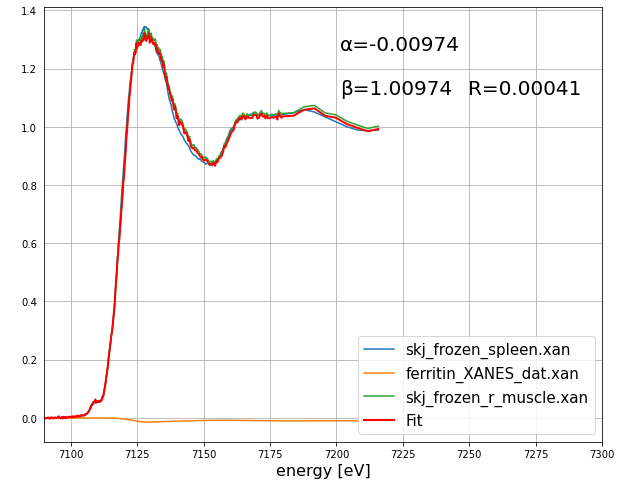

In [51]:
'2成分手動(改良)'
sample = [27,8,26]

%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_xlabel("energy [eV]",fontsize=16)
ax.set_ylabel(" ")
ax.set_xlim(7090, 7300)
ax.grid()
ax.tick_params(left=False)

x=320
target = spectrum[1][sample[0]][0:x]
std1 = spectrum[1][sample[1]][0:x]
std2 = spectrum[1][sample[2]][0:x]
energy1 = spectrum[0][sample[0]][0:x]

def Calc(x):  
    y =  std1*x[0] + std2*x[1]
    return(y)

def Rval(x):
    R = sum((Calc(x) -  target)**2)/sum(target**2)#この計算式２条がsumのカッコ内に入る
    return(R)

Fit = scipy.optimize.minimize(Rval,x0=(0.5,0.5),bounds=[(-1,1),(-1,1)])
a,b = Fit.x[0], Fit.x[1]
factor = [1,a,b]

for m in range(len(sample)):
    energy =  [float(i) for i in spectrum[0][sample[m]][0:x]]
    value = spectrum[1][sample[m]][0:x]*factor[m]
    ax.plot(energy,value, label=spectrum[2][sample[m]])
ax.plot(energy,Calc([a,b]),color="red",linewidth = 2, label="Fit")

ax.text(0.53,0.9,"α="+str(round(a/(a+b),5)),size=20,transform=ax.transAxes)
ax.text(0.53,0.8,"β="+str(round(b/(a+b),5)),size=20,transform=ax.transAxes)
ax.text(0.76,0.8,"R="+str(round(Rval([a,b]),5)),size=20,transform=ax.transAxes)
ax.legend(loc="lower right", fontsize=15)
print([a,b])
print(Fit.message)
print(sum(Calc([a,b]) -  target)**2/sum(target)**2)

In [ ]:
standards = [0,1,3,4,5,8,9,10,11,12,21,22,23,29]

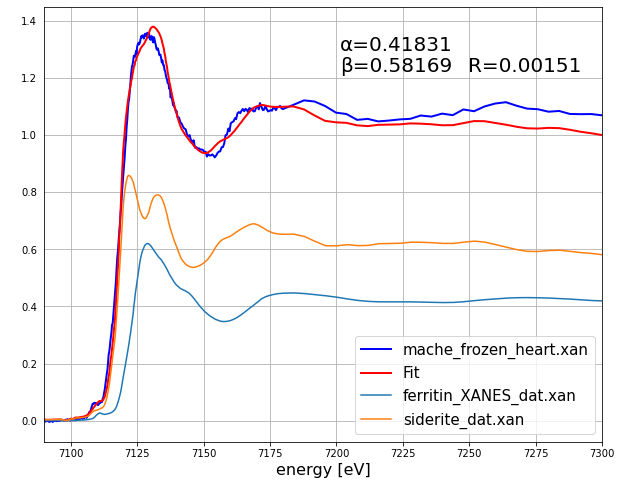

In [43]:
'''2成分探索'''
standards =  [0,1,3,4,5,9,8,10,11,21,22,23,29,26]
target = 18

%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_xlabel("energy [eV]",fontsize=16)
ax.set_ylabel(" ")
ax.set_xlim(7090, 7300)
ax.grid()
ax.tick_params(left=False)

result = [[],[],[]]
result[0]=1
def Calc(std,x):  
    y =  std[0]*x[0] + std[1]*x[1] 
    return(y)

for v in itertools.combinations(standards, 3):
    std_group = [spectrum[1][v[0]],spectrum[1][v[1]]]
    def Rval(x):
        R = sum((Calc(std_group,x) -  spectrum[1][target])**2)/sum(spectrum[1][target]**2)#この計算式２条がsumのカッコ内に入る
        return(R)
    Fit = scipy.optimize.minimize(Rval,x0=(0,0),bounds=[(0,1),(0,1)])
    if (Rval([Fit.x[0],Fit.x[1]]) <= result[0]):
        result[1]=Fit.x[0]
        result[2]=Fit.x[1]
        result[0] = Rval([Fit.x[0],Fit.x[1]])
        log=(v)
        logstd=std_group
    else: continue

a,b = result[1],result[2]

def Rval2 (x):
    R = sum((Calc(logstd,x) -  spectrum[1][target])**2)/sum(spectrum[1][target]**2)#この計算式２条がsumのカッコ内に入る
    return(R)

energy =  [float(i) for i in spectrum[0][target]]
ax.plot(energy,spectrum[1][target],color="blue",linewidth = 2, label=spectrum[2][target])
ax.plot(energy,Calc(logstd, [a,b]),color="red",linewidth = 2, label="Fit")

for m in range(2):
    energy =  [float(i) for i in spectrum[0][log[m]]]
    value = spectrum[1][log[m]]*result[m+1]
    ax.plot(energy,value, label=spectrum[2][log[m]])
    
ax.text(0.53,0.9,"α="+str(round(a/(a+b),5)),size=20,transform=ax.transAxes)
ax.text(0.53,0.85,"β="+str(round(b/(a+b),5)),size=20,transform=ax.transAxes)


ax.text(0.76,0.85,"R="+str(round(Rval2([a,b]),5)),size=20,transform=ax.transAxes)
ax.legend(loc="lower right", fontsize=15)

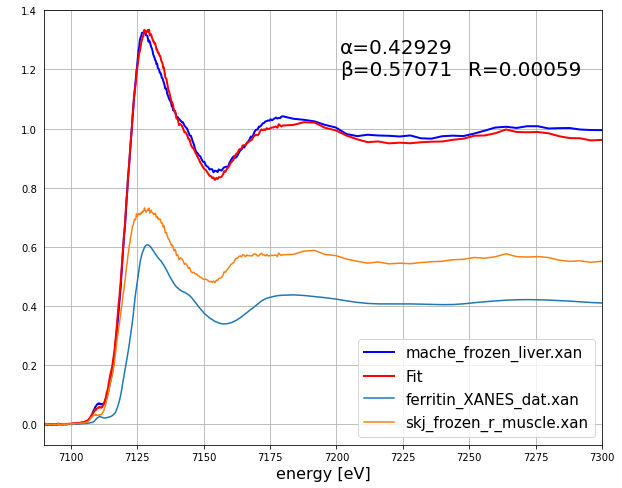

In [45]:
'2成分探索'
standards = [0,1,3,4,5,8,9,10,11,12,21,22,23,29,26,16]
target = 19

%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_xlabel("energy [eV]",fontsize=16)
ax.set_ylabel(" ")
ax.set_xlim(7090, 7300)
ax.grid()
ax.tick_params(left=False)

result = [[],[],[]]
result[0]=1
def Calc(std,x):  
    y =  std[0]*x[0] + std[1]*x[1] 
    return(y)

for v in itertools.combinations(standards, 3):
    std_group = [spectrum[1][v[0]],spectrum[1][v[1]]]
    def Rval(x):
        R = sum((Calc(std_group,x) -  spectrum[1][target])**2)/sum(spectrum[1][target]**2)#この計算式２条がsumのカッコ内に入る
        return(R)
    Fit = scipy.optimize.minimize(Rval,x0=(0,0),bounds=[(0,1),(0,1)])
    if (Rval([Fit.x[0],Fit.x[1]]) <= result[0]):
        result[1]=Fit.x[0]
        result[2]=Fit.x[1]
        result[0] = Rval([Fit.x[0],Fit.x[1]])
        log=(v)
        logstd=std_group
    else: continue

a,b = result[1],result[2]

def Rval2 (x):
    R = sum((Calc(logstd,x) -  spectrum[1][target])**2)/sum(spectrum[1][target]**2)#この計算式２条がsumのカッコ内に入る
    return(R)

energy =  [float(i) for i in spectrum[0][target]]
ax.plot(energy,spectrum[1][target],color="blue",linewidth = 2, label=spectrum[2][target])
ax.plot(energy,Calc(logstd, [a,b]),color="red",linewidth = 2, label="Fit")

for m in range(2):
    energy =  [float(i) for i in spectrum[0][log[m]]]
    value = spectrum[1][log[m]]*result[m+1]
    ax.plot(energy,value, label=spectrum[2][log[m]])
    
ax.text(0.53,0.9,"α="+str(round(a/(a+b),5)),size=20,transform=ax.transAxes)
ax.text(0.53,0.85,"β="+str(round(b/(a+b),5)),size=20,transform=ax.transAxes)


ax.text(0.76,0.85,"R="+str(round(Rval2([a,b]),5)),size=20,transform=ax.transAxes)
ax.legend(loc="lower right", fontsize=15)

In [50]:
log[0]

8

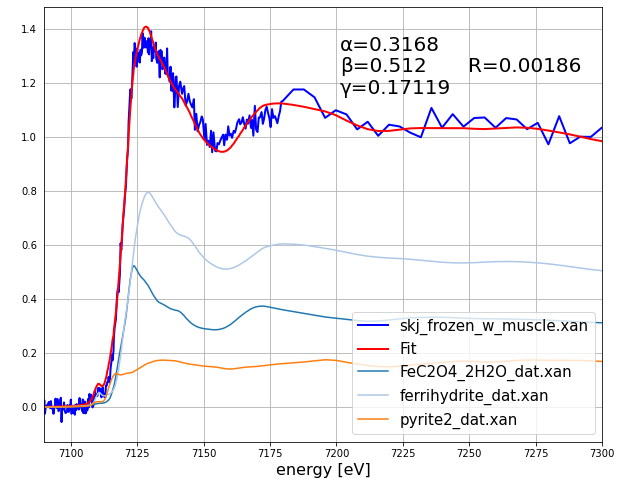

In [23]:
'''3成分探索'''
from matplotlib import pylab as plt
cm = plt.cm.get_cmap("tab20")#colormapの指定
standards = [0,1,3,4,5,8,9,10,11,21,22,23,29,26,2,16]
target = 28

%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_xlabel("energy [eV]",fontsize=16)
ax.set_ylabel(" ")
ax.set_xlim(7090, 7300)
ax.grid()
ax.tick_params(left=False)

result = [[],[],[],[]]
result[0]=1
def Calc(std,x):  
    y =  std[0]*x[0] + std[1]*x[1] + std[2]*x[2]
    return(y)

for v in itertools.combinations(standards, 3):
    std_group = [spectrum[1][v[0]],spectrum[1][v[1]],spectrum[1][v[2]]]
    def Rval(x):
        R = sum((Calc(std_group,x) -  spectrum[1][target])**2)/sum(spectrum[1][target]**2)#この計算式２条がsumのカッコ内に入る
        return(R)
    Fit = scipy.optimize.minimize(Rval,x0=(0,0,0),bounds=[(0,1),(0,1),(0,1)])
    if (Rval([Fit.x[0],Fit.x[1],Fit.x[2]]) <= result[0]):
        result[1]=Fit.x[0]
        result[2]=Fit.x[1]
        result[3]=Fit.x[2]
        result[0] = Rval([Fit.x[0],Fit.x[1],Fit.x[2]])
        log=(v)
        logstd=std_group
    else: continue

a,b,c = result[1],result[2],result[3]

def Rval2 (x):
    R = sum((Calc(logstd,x) -  spectrum[1][target])**2)/sum(spectrum[1][target]**2)#この計算式２条がsumのカッコ内に入る
    return(R)

energy =  [float(i) for i in spectrum[0][target]]
ax.plot(energy,spectrum[1][target],color="blue",linewidth = 2, label=spectrum[2][target])
ax.plot(energy,Calc(logstd, [a,b,c]),color="red",linewidth = 2, label="Fit")

for m in range(3):
    energy =  [float(i) for i in spectrum[0][log[m]]]
    value = spectrum[1][log[m]]*result[m+1]
    ax.plot(energy,value,color = cm.colors[m], label=spectrum[2][log[m]])
    
ax.text(0.53,0.9,"α="+str(round(a/(a+b+c),5)),size=20,transform=ax.transAxes)
ax.text(0.53,0.85,"β="+str(round(b/(a+b+c),5)),size=20,transform=ax.transAxes)
ax.text(0.53,0.8,"γ="+str(round(c/(a+b+c),5)),size=20,transform=ax.transAxes)


ax.text(0.76,0.85,"R="+str(round(Rval2([a,b,c]),5)),size=20,transform=ax.transAxes)
ax.legend(loc="lower right", fontsize=15)

In [74]:
print(Rval(a2))

0.0019829593267799432


[0.37329586519328983, 0.480654618392634, 0.09747841200430707]


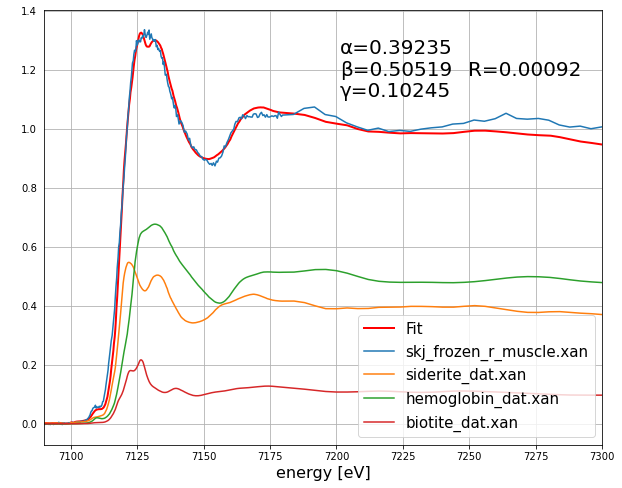

In [16]:
sample = [20,17,11,1]

%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_xlabel("energy [eV]",fontsize=16)
ax.set_ylabel(" ")
ax.set_xlim(7090, 7300)
ax.grid()
ax.tick_params(left=False)

target = spectrum[1][sample[0]]
std1 = spectrum[1][sample[1]]
std2 = spectrum[1][sample[2]]
std3 = spectrum[1][sample[3]]

def Calc(x):  
    y =  std1*x[0] + std2*x[1] + std3*x[2]
    return(y)

def Rval(x):
    R = sum((Calc(x) -  target)**2)/sum(target**2)#この計算式２条がsumのカッコ内に入る
    return(R)

Fit = scipy.optimize.minimize(Rval,x0=(0,0,0),bounds=[(-1,1),(-1,1),(-1,1)])
a,b,c = Fit.x[0], Fit.x[1], Fit.x[2]
factor = [1,a,b,c]

energy =  [float(i) for i in spectrum[0][sample[3]]]
ax.plot(energy,Calc([a,b,c]),color="red",linewidth = 2, label="Fit")

for m in range(len(sample)):
    energy =  [float(i) for i in spectrum[0][sample[m]]]
    value = spectrum[1][sample[m]]*factor[m]
    ax.plot(energy,value, label=spectrum[2][sample[m]])
    
ax.text(0.53,0.9,"α="+str(round(a/(a+b+c),5)),size=20,transform=ax.transAxes)
ax.text(0.53,0.85,"β="+str(round(b/(a+b+c),5)),size=20,transform=ax.transAxes)
ax.text(0.53,0.8,"γ="+str(round(c/(a+b+c),5)),size=20,transform=ax.transAxes)


ax.text(0.76,0.85,"R="+str(round(Rval([a,b,c]),5)),size=20,transform=ax.transAxes)
ax.legend(loc="lower right", fontsize=15)
print([a,b,c])

In [477]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)


[0.99244289 0.00755711]
[6.30061232 0.54980396]


In [478]:
df=pd.DataFrame({"1":spectrum[1][0],
                 "2":spectrum[1][1],
                 "3":spectrum[1][2],
                 "4":spectrum[1][3],
                 "5":spectrum[1][4],
                 "6":spectrum[1][5],
                 
                })

In [479]:
pca=PCA(n_components=4)
df_pca=pca.fit(df)

print(pca.explained_variance_ratio_,"分散の説明率")
print(pca.singular_values_)
print(pca.components_,"計算によって得られる固有ベクトル")
print(pca.explained_variance_,"各主成分の分散")

[0.95310144 0.0348364  0.00987254 0.00152991] 分散の説明率
[27.10821461  5.18260343  2.75896287  1.08608628]
[[ 0.38759656  0.42789054  0.46729978  0.38540235  0.39669066  0.3773739 ]
 [-0.34596009  0.68872937 -0.04441787  0.31724407 -0.15916831 -0.5272686 ]
 [-0.26069759  0.29815552 -0.31446569  0.0374349  -0.43861896  0.74193222]
 [-0.20505584  0.29729714  0.54026261 -0.75662085 -0.05991947  0.0402165 ]] 計算によって得られる固有ベクトル
[2.16133912 0.07899817 0.02238787 0.00346936] 各主成分の分散


相関係数0.889:


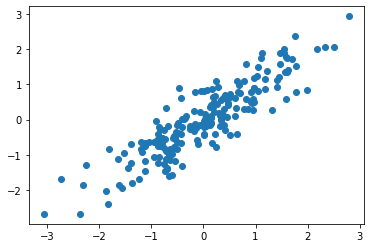

In [480]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# RandomStateオブジェクトを作成
sample = np.random.RandomState(1)

#２つの乱数を生成
X = np.dot(sample.rand(2, 2), sample.randn(2, 200)).T

# 標準化 (標準化しているので、変数は平均が0、分散が1)
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 相関係数の算出とグラフ化
print('相関係数{:.3f}:'.format(sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]))
plt.scatter(X_std[:, 0], X_std[:, 1])

In [481]:
'''フィッティングの最適値を求める関数（２つのスペクトルでフィット）'''
import scipy.optimize

def Fit(n):
    Calc =  spectrum[1][sample[1]]*n+spectrum[1][sample[2]]*(1-n)
    Calc = Calc/(max(Calc)/max(spectrum[1][sample[0]]))
   
    SUM = (sum(Calc - spectrum[1][sample[0]]))**2
    return(SUM)

n_value = scipy.optimize.minimize(Fit, x0=[0.8])#x0はパラメタの初期値
print(n_value)
print(Fit(n_value))

TypeError: 'numpy.random.mtrand.RandomState' object is not subscriptable

In [150]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
malignant = cancer.data[cancer.target==0] # 悪性
benign = cancer.data[cancer.target==1] # 良性

In [158]:
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [175]:
X_std

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [151]:
# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

# 実装したクラスを使って主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print('X_pca shape:{}'.format(X_pca.shape))

X_pca shape:(569, 2)


In [152]:
X_pca = pd.DataFrame(X_pca, columns=['pc1','pc2']) # ラベルを付ける
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1) # 目的変数を結合

# 悪性、良性を分ける
pca_malignant = X_pca[X_pca['target']==0]
pca_benign = X_pca[X_pca['target']==1]

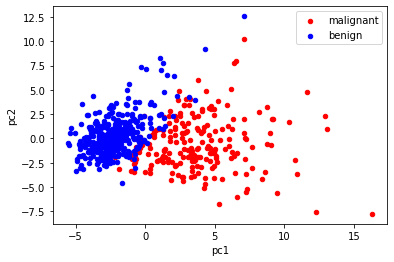

In [153]:
# 悪性をプロット
ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant');

# 良性をプロット
pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign', ax=ax);

In [235]:
X_pca = pca.transform(df)

print('X_pca shape:{}'.format(X_pca.shape))

X_pca shape:(341, 2)


In [237]:
X_pca = pd.DataFrame(X_pca, columns=['pc1','pc2']) # ラベルを付ける
X_pca

,pc1,pc2
0,-1.610890,-0.038899
1,-1.610892,-0.038871
2,-1.610816,-0.038841
3,-1.610936,-0.038824
4,-1.611258,-0.038679
...,...,...
336,0.685761,-0.093307
337,0.656569,-0.091114
338,0.632203,-0.083935
339,0.611887,-0.074465
